**<center>CAP-400 - Visualização e Análise Computacional de Séries Temporais</center>**

**<center>Professor Dr. Reinaldo Rosa</center>**

# <center>Testes</center>

**<center>André Ricardo Fazanaro Martinon</center>**

**<center>15 de fevereiro de 2020</center>**

## Instalação das bibliotecas pyGPA e pyCML

Será preciso instalar as bibliotecas se estivermos executando este notebook no ambiente do Google Colab.

In [1]:
running_in_colab = 'google.colab' in str(get_ipython())
if running_in_colab:
    print('Running on Google Colab')
else:
    print('Not running on Google Colab')

Not running on Google Colab


In [2]:
if running_in_colab:
    !pip install git+https://github.com/andremartinon/pyGPA

In [3]:
if running_in_colab:
    !pip install git+https://github.com/andremartinon/pyCML

## Implementação

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import HTML
from pathlib import Path

from cml import Evolution, GPAMetric, GradientMetric, CML, RandomInitialCondition, SteadyBoundaryCondition, \
    FourNeighborCoupling, LogisticMap

In [5]:
iterations = 1024

In [6]:
datasetcmltest1 = CML(RandomInitialCondition(seed=2021),
                      SteadyBoundaryCondition(),
                      LogisticMap(3.9),
                      FourNeighborCoupling(0.25),
                      grid_size=3)

datasetcmltest2 = CML(RandomInitialCondition(seed=2021),
                      SteadyBoundaryCondition(),
                      LogisticMap(3.9),
                      FourNeighborCoupling(0.25),
                      grid_size=11)

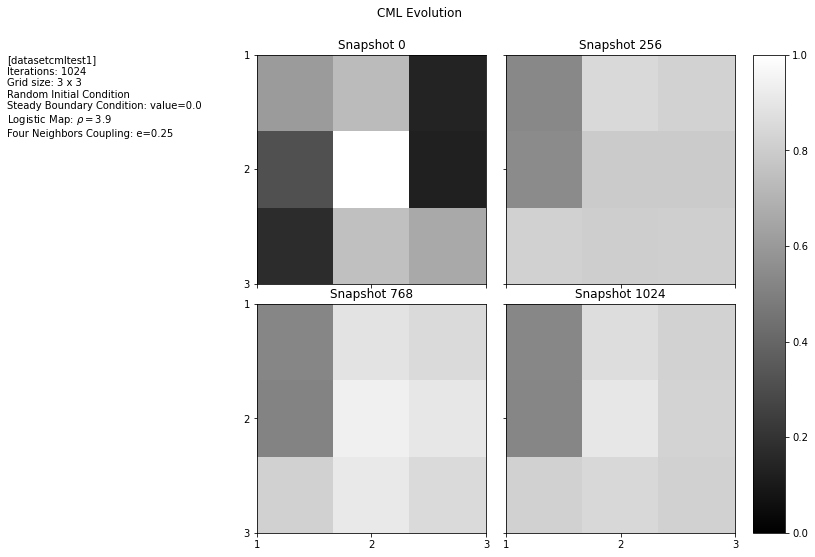

In [7]:
datasetcmltest1_evolution = Evolution(datasetcmltest1, iterations=iterations, dataset_name='datasetcmltest1')
datasetcmltest1_evolution.run()
datasetcmltest1_evolution.plot()

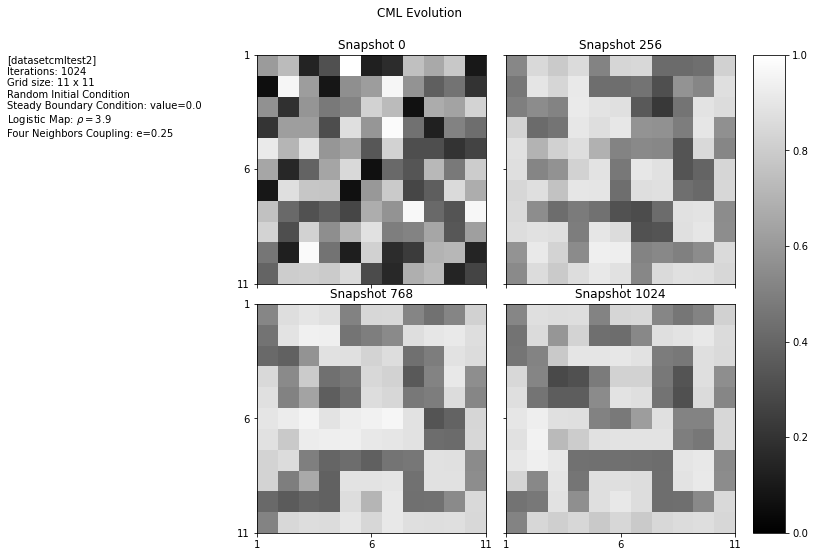

In [8]:
datasetcmltest2_evolution = Evolution(datasetcmltest2, iterations=iterations, dataset_name='datasetcmltest2')
datasetcmltest2_evolution.run()
datasetcmltest2_evolution.plot()

Uma vez criada a instância podemos utilizar os métodos save_csv, plot e animate da classe Evolution.

In [9]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [10]:
def get_middle(arr):
    n = int(arr.shape[0] / 2.0)
    if n % 2 != 0:
        return arr[[n], [n]]

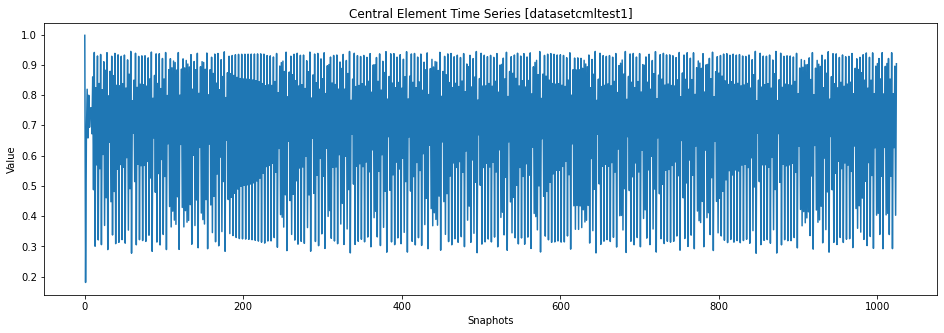

In [11]:
datasetcmltest1_time_series = np.ndarray((datasetcmltest1_evolution.iterations+1,))

for i, snapshot in enumerate(datasetcmltest1_evolution.snapshots):
    datasetcmltest1_time_series[i] = get_middle(snapshot.u)


plt.figure(figsize=(16, 5))
plt.title(f'Central Element Time Series [{datasetcmltest1_evolution.dataset_name}]')
plt.ylabel('Value')
plt.xlabel('Snaphots')
_ = plt.plot(datasetcmltest1_time_series)

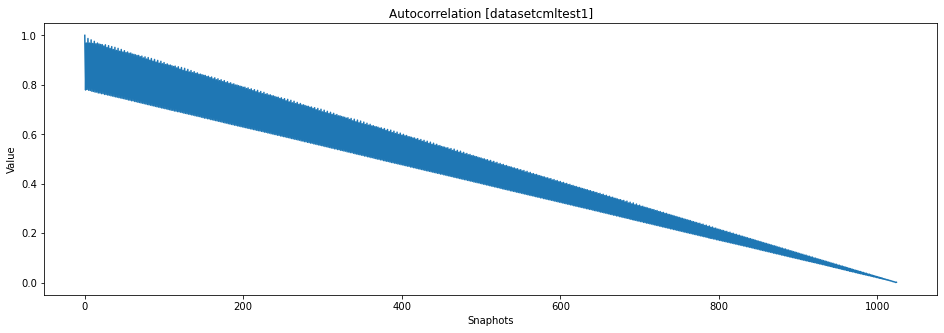

In [12]:
z = autocorr(datasetcmltest1_time_series)
plt.figure(figsize=(16, 5))
plt.title(f'Autocorrelation [{datasetcmltest1_evolution.dataset_name}]')
plt.ylabel('Value')
plt.xlabel('Snaphots')
plt.plot(z / z.max())

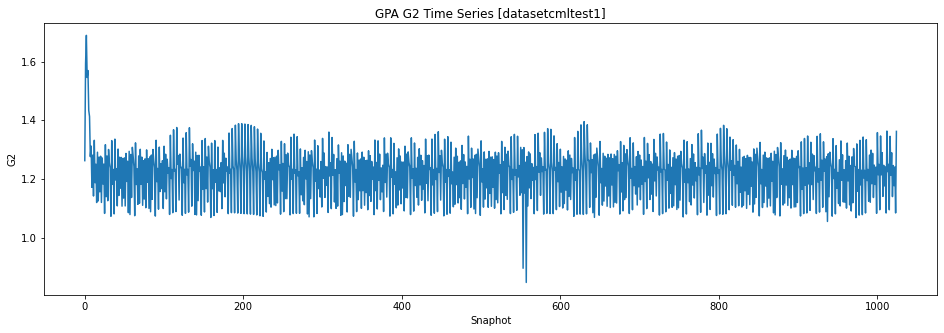

In [13]:
gpa_metric = GPAMetric(datasetcmltest1_evolution)
gpa_metric.measure(tolerance=0.01)
datasetcmltest1_g2 = gpa_metric.metrics[:, 1]
plt.figure(figsize=(16, 5))
plt.title(f'GPA G2 Time Series [{datasetcmltest1_evolution.dataset_name}]')
plt.ylabel('G2')
plt.xlabel('Snaphot')
_ = plt.plot(datasetcmltest1_g2)

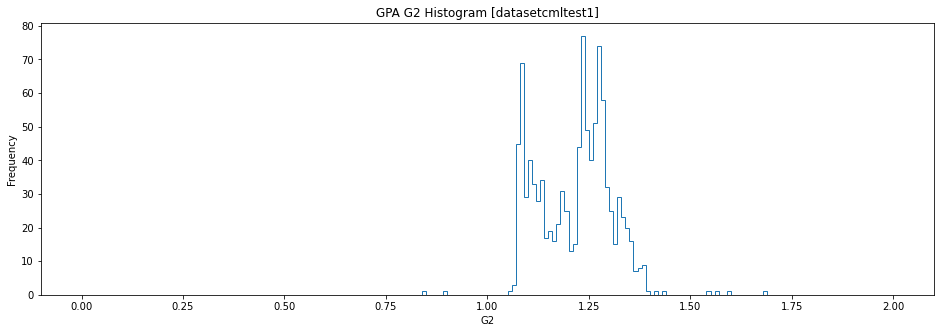

In [14]:
bins = 200

plt.figure(figsize=(16, 5))
plt.hist(datasetcmltest1_g2, histtype='step', range=(0, 2), bins=bins)
plt.title(f'GPA G2 Histogram [{datasetcmltest1_evolution.dataset_name}]')
plt.ylabel('Frequency')
_ = plt.xlabel('G2')

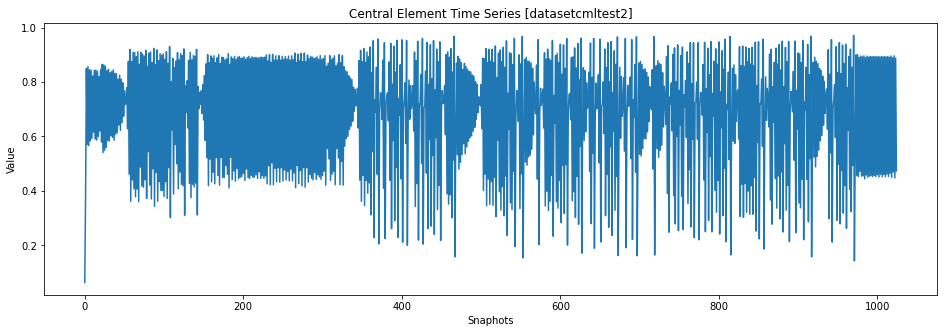

In [15]:
datasetcmltest2_time_series = np.ndarray((datasetcmltest2_evolution.iterations+1,))

for i, snapshot in enumerate(datasetcmltest2_evolution.snapshots):
    datasetcmltest2_time_series[i] = get_middle(snapshot.u)


plt.figure(figsize=(16, 5))
plt.title(f'Central Element Time Series [{datasetcmltest2_evolution.dataset_name}]')
plt.ylabel('Value')
plt.xlabel('Snaphots')
_ = plt.plot(datasetcmltest2_time_series)

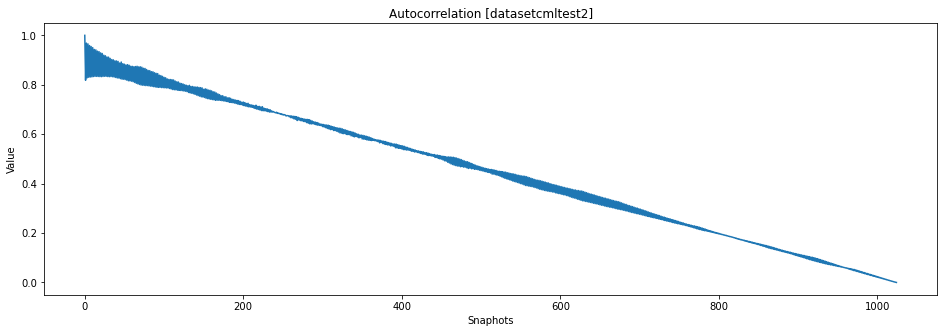

In [16]:
z = autocorr(datasetcmltest2_time_series)
plt.figure(figsize=(16, 5))
plt.title(f'Autocorrelation [{datasetcmltest2_evolution.dataset_name}]')
plt.ylabel('Value')
plt.xlabel('Snaphots')
plt.plot(z / z.max())

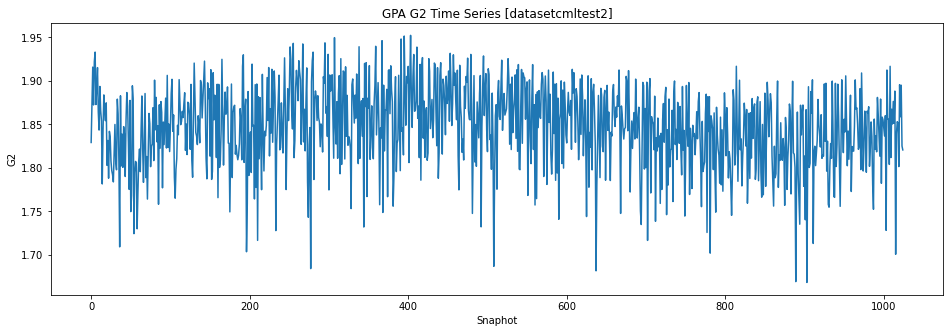

In [17]:
gpa_metric = GPAMetric(datasetcmltest2_evolution)
gpa_metric.measure(tolerance=0.01)
datasetcmltest2_g2 = gpa_metric.metrics[:, 1]
plt.figure(figsize=(16, 5))
plt.title(f'GPA G2 Time Series [{datasetcmltest2_evolution.dataset_name}]')
plt.ylabel('G2')
plt.xlabel('Snaphot')
_ = plt.plot(datasetcmltest2_g2)

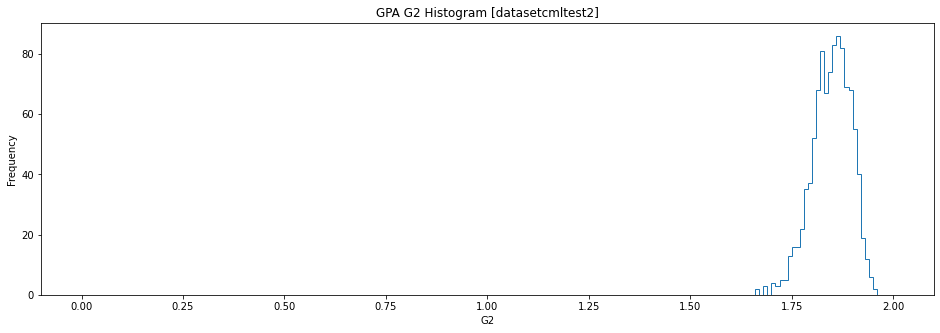

In [18]:
bins = 200

plt.figure(figsize=(16, 5))
plt.hist(datasetcmltest2_g2, histtype='step', range=(0, 2), bins=bins)
plt.title(f'GPA G2 Histogram [{datasetcmltest2_evolution.dataset_name}]')
plt.ylabel('Frequency')
_ = plt.xlabel('G2')